In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

import warnings
warnings.filterwarnings('ignore')

C:\Python\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Python\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Step 1

In [5]:
conflict = pd.read_csv("Version 1_not scaled_brdbins.csv")

In [6]:
conflict.info

<bound method DataFrame.info of      Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  \
0              1        0        0       0          0        0          0   
1              1        0        0       0          0        0          0   
2              1        0        0       0          0        0          0   
3              1        0        0       0          0        0          0   
4              1        0        0       0          0        0          0   
..           ...      ...      ...     ...        ...      ...        ...   
956            0        0        0       0          0        0          0   
957            0        0        0       0          0        0          0   
958            0        0        0       0          0        0          0   
959            0        0        0       0          0        0          0   
960            0        0        0       0          0        0          0   

     Azerbaijan  Bangladesh  Belgium  ...  

In [7]:
features = conflict.columns

In [8]:
conflictnp = conflict.to_numpy()

In [9]:
conflict.shape

(961, 161)

In [10]:
X = conflictnp[:, 0:160]

In [11]:
X.shape

(961, 160)

In [12]:
y = conflictnp[:, 160]

In [13]:
yy = pd.DataFrame(data=y)

In [14]:
target_names = ["none", "low", "medium", "high"]

In [15]:
y.shape

(961,)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Step 2

PCA without scaled data

In [18]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca1 = PCA(n_components=2)
# fit PCA model to data
pca1.fit(X_train)

# transform data onto the first two principal components
X_pca1 = pca1.transform(X_train)

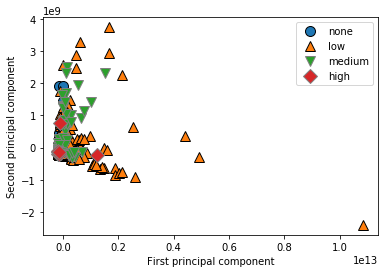

In [19]:
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], y_train) 
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")
plt.legend(target_names, loc="best")

There isn't a whole lot of separation on this two-dimensional scatter plot, unfortunately. 

Text(0, 0.5, 'Principal components')

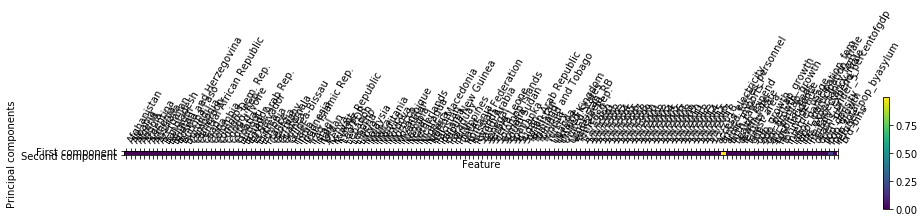

In [20]:
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(features)),
           features, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

While the scale on the right-hand side is not easily interpretable, it does give us a relative understanding of the weights of the features by each of the two components. There is only one little chunk of yellow in the heat map above, but unfortunately, I can't see which feature it represents!

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

Scaling data: I take this step to whiten the data, or decorrelate the features.

Text(0, 0.5, 'Second principal component')

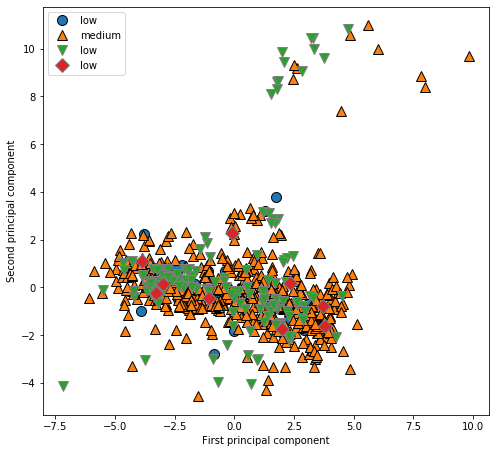

In [22]:
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], y_train)
plt.legend(y_train, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

There's more separation of the points and now there's less collinearity as well! Unfortunately, there's still a lot of overlap.

Text(0, 0.5, 'Principal components')

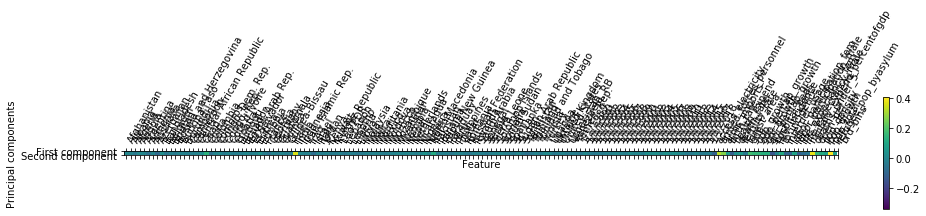

In [23]:
plt.matshow(pca2.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(features)),
           features, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

More colors! While there's still the same problem of not being able to read the actual features, this heat map has much more variation in the weights of the features between the first and second components.

In [24]:
# keep the first two principal components of the data
pca3 = PCA()
# fit PCA model to data
pca3.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca3.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[4.88870928e-02 2.84017609e-02 2.21205762e-02 1.87425653e-02
 1.62341080e-02 1.43095146e-02 1.40307088e-02 1.31774040e-02
 1.27479289e-02 1.23220919e-02 1.14067766e-02 1.10393816e-02
 1.05775968e-02 1.04350815e-02 1.01500886e-02 9.97966538e-03
 9.74705991e-03 9.68857167e-03 9.46612565e-03 9.40908022e-03
 9.07707859e-03 9.02704695e-03 8.98669090e-03 8.85458117e-03
 8.71974897e-03 8.67378529e-03 8.60157311e-03 8.56825165e-03
 8.52000293e-03 8.43704637e-03 8.37336843e-03 8.32448539e-03
 8.16637603e-03 8.11092690e-03 8.06891164e-03 7.97327826e-03
 7.86807796e-03 7.82018693e-03 7.68949193e-03 7.65477169e-03
 7.63042151e-03 7.57485733e-03 7.51368776e-03 7.43891796e-03
 7.31103672e-03 7.26630485e-03 7.20158777e-03 7.06360552e-03
 7.01443161e-03 6.93488012e-03 6.91953312e-03 6.86600763e-03
 6.81586018e-03 6.79108998e-03 6.78490046e-03 6.77401800e-03
 6.75979829e-03 6.74716309e-03 6.74242695e-03 6.74000930e-03
 6.73128272e-03 6.72

In [25]:
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca4.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.04888709 0.02840176 0.02212058 0.01874257 0.01623411 0.01430951
 0.01403071 0.0131774  0.01274793 0.01232209 0.01140678 0.01103938
 0.0105776  0.01043508 0.01015009 0.00997967 0.00974706 0.00968857
 0.00946613 0.00940908 0.00907708 0.00902705 0.00898669 0.00885458
 0.00871975 0.00867379 0.00860157 0.00856825 0.00852    0.00843705
 0.00837337 0.00832449 0.00816638 0.00811093 0.00806891 0.00797328
 0.00786808 0.00782019 0.00768949 0.00765477 0.00763042 0.00757486
 0.00751369 0.00743892 0.00731104 0.0072663  0.00720159 0.00706361
 0.00701443 0.00693488 0.00691953 0.00686601 0.00681586 0.00679109
 0.0067849  0.00677402 0.0067598  0.00674716 0.00674243 0.00674001
 0.00673128 0.00672113 0.00671599 0.00670898 0.00670365 0.0067015
 0.00669563 0.00669173 0.00668736 0.00667869 0.00667564 0.00666992
 0.00666829 0.00666558 0.00666213 0.00666034 0.00665693 0.00665584
 0.00665224 0.0066512  0.00664973 0.00664836 0.00664688 0.0066461

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)
# transform data onto the first ten principal components
X_pca4 = pca4.transform(X_scaled)
   
for train_index, test_index in split.split(X_scaled, y_train):
    X_train = X_pca4[train_index]
    X_test = X_pca4[test_index]
    y_train1 = y_train[train_index]
    y_test1 = y_train[test_index]
    
model=LogisticRegression().fit(X_train, y_train1)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train1)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test1)))

Accuracy on training set: 0.85
Accuracy on test set: 0.69


There's overfitting happening and the accuracy on the test score is relatively low. I can't necessarily compare it to the models from Project 2, however, because I've changed datasets and model types (Project 2 worked with Linear Regression)

# Step 3: Clusters with PCA

K-Means

Text(0, 0.5, 'Feature 1')

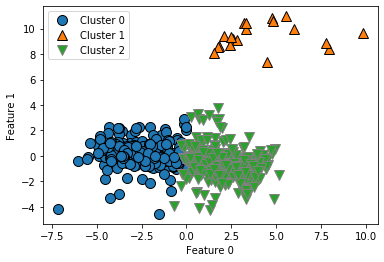

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

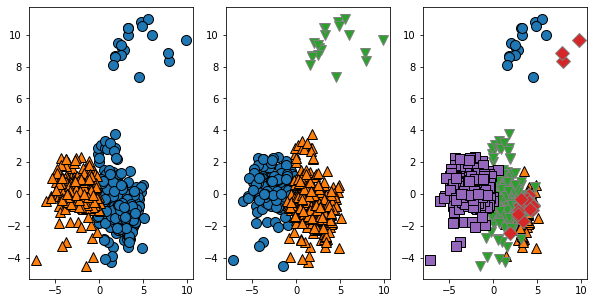

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[0])

# using three cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[1])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[2])

KMeans assumes the clusters have the same width/diameter. There tend to be issues with non-spherical/complex shape clusters but my shapes are rather spherical so that shouldn't be a problem; however, because there are data points that overlap, the random initialization of KMeans may cause me to have different clusters each time that it's run. 

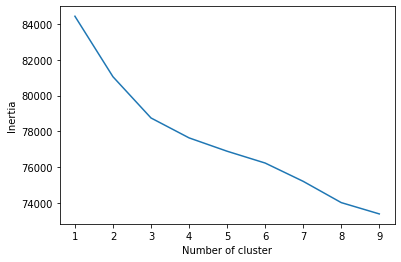

In [29]:
inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Because this elbow graph has a relatively smooth curve all the way down to 9, I've created a scatterplot below with 9 clusters.

Text(0, 0.5, 'Feature 1')

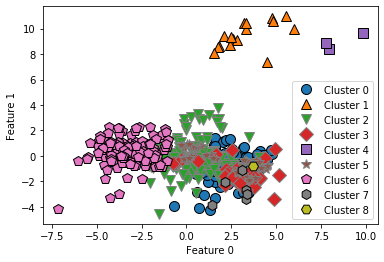

In [30]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7", "Cluster 8", "Cluster 9"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Agglomerative Clusters

Text(0, 0.5, 'Feature 1')

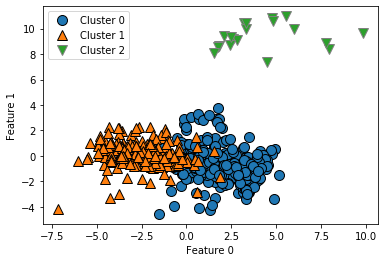

In [31]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

With stopping point=3, 3 clusters are made. There is a bit of overlap between Cluster 0 and Cluster 1.

Text(0, 0.5, 'Cluster distance')

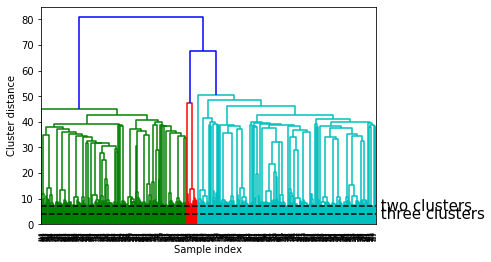

In [32]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

When I change the stopping criteria from 3 to 4, only one point is changed and classified as it's own individual cluster. Because of that, 3 seems to be the better n for agglomerative clustering. 

Dendrogram - visualization of multidimensional datasets, information about cluster distances --> in my dataset, there is a small distance between the points within each cluster

DBScan

Text(0, 0.5, 'Feature 1')

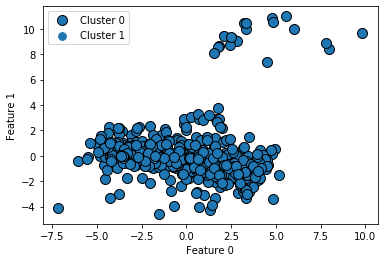

In [33]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=4,eps=0.2)
clusters = dbscan.fit_predict(X_train)

# plot the cluster assignments
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In its attempt to distinguish between densely and sparsely populated data, it finds two clusters. However, the clusters cannot necessarily be distinguished in the graph above. I'm surprised that it hasn't identified outliers. 

Adjusting min_samples:

Text(0, 0.5, 'Feature 1')

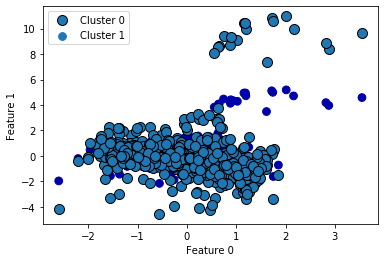

In [34]:
dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_scaled)

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled1 = scaler.transform(X_train)

dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_scaled1)


# plot the cluster assignments
plt.scatter(X_scaled1[:, 0], X_scaled1[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_scaled1[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Strangely enough, it's now possible to distinguish two different colors of dots, but the darker blue doesn't match anything on the legend.

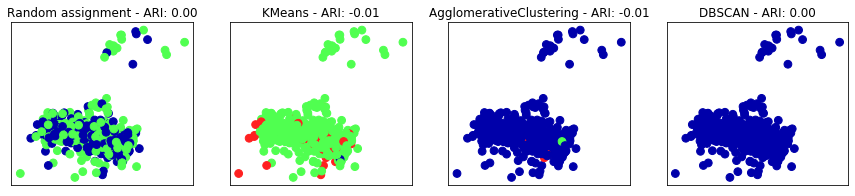

In [35]:
from sklearn.metrics.cluster import adjusted_rand_score

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train1, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train1, clusters)))

While KMeans has the highest ARI of 0.01, it is nowhere near the 1=ground truth and very close to the random assignment, which leads me to believe that clustering is not very useful on this dataset.

# Step 3: Without PCA

In [36]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=0)

Text(0, 0.5, 'Feature 1')

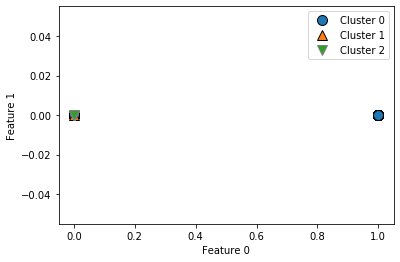

In [37]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train2)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train2[:, 0], X_train2[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

These clusters are on top of one another! PCA hasn't been used which means that collinearity is stronger and data points aren't as separated.

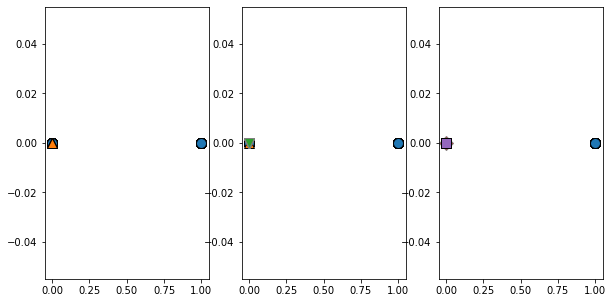

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train2)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train2[:, 0], X_train2[:, 1], assignments, ax=axes[0])

# using three cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train2)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train2[:, 0], X_train2[:, 1], assignments, ax=axes[1])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train2)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train2[:, 0], X_train2[:, 1], assignments, ax=axes[2])

Changing the number of clusters has not helped my vizualization become any clearer. 

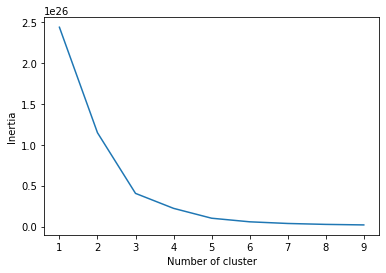

In [39]:
inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train2)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Based on this elbow chart, the most dramatic increase in slope happens between 1 and 2, and the slope plateaus somewhere after 5. 

Text(0, 0.5, 'Feature 1')

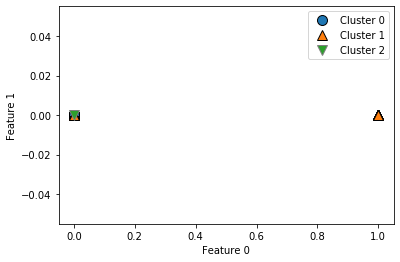

In [40]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train2)

mglearn.discrete_scatter(X_train2[:, 0], X_train2[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

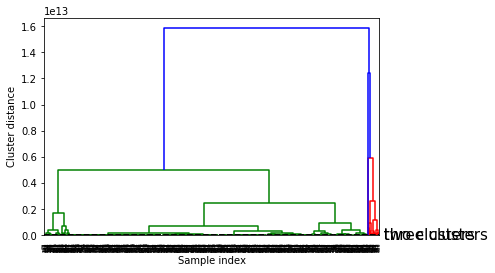

In [41]:
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array1 = ward(X_train2)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array1)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

An even smaller space between clusters, than with PCA and Agglomerative Clustering applied.

Text(0, 0.5, 'Feature 1')

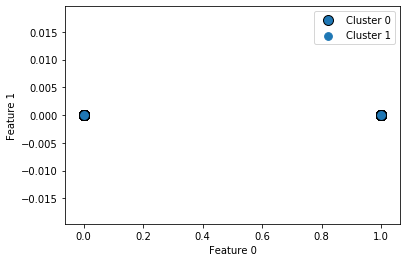

In [42]:
dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_train2)

# plot the cluster assignments
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train2[:, 0], X_train2[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

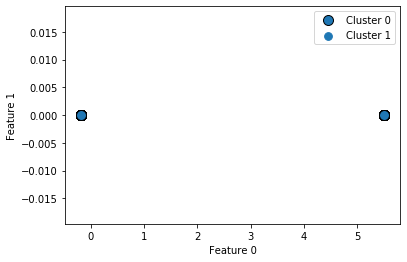

In [43]:
scaler = StandardScaler()
scaler.fit(X_train2)
X_scaled2 = scaler.transform(X_train2)

dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_scaled2)


# plot the cluster assignments
plt.scatter(X_scaled2[:, 0], X_scaled2[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_scaled2[:, 0], X_train2[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

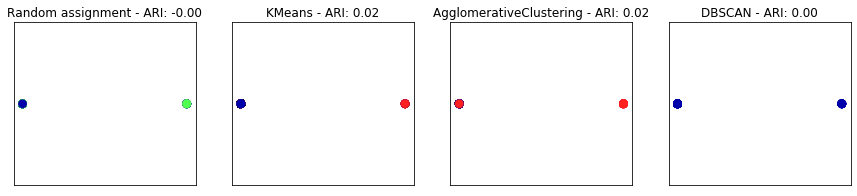

In [44]:
# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X_train2)
X_scaled = scaler.transform(X_train2)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train2))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train2, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train2, clusters)))

Really poor ARI metrics - no clustering technique brings the score close to 1! Clustering without PCA doesn't work well for my data, either. 